## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
#Import the required libs for basic data handling
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
#Toggle b/w local and colab
project_path = "/content/drive/My Drive/dogbreed/DogBreed_Classification/"
#project_path = "./DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
#Unzip and extract all the training images
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
#Unzip and extract all the test images

with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
#Unzip and extract the test image ids

with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
#Unzip and extract the training image ids and corresponding labels

with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
#Get the dog breed labels from the unzipped file
label_df = pd.read_csv("labels.csv")

In [9]:
#sanity check
label_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [10]:
#Check the unique # of breeds which is essentially the num of classes
len(label_df.breed.unique())

120

In [11]:
#Check the data types..both were loaded as objects..cannot easily determine if they are any null/invalida values
#For now we will assume everything is in order and move forward
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


### Print the count of each category of Dogs given in the dataset



In [12]:
#Check the counts of each breed in the labels in the training dataset
label_df.breed.value_counts()

#We can see counts raning from 66 to 126...some breeds are better represented. This imbalance will be a challenge

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [0]:
#OneHotEncoding of labels
#We will use LabelBinarizer from scikit for label one hot encoding
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [14]:
#Initialize the encoder and fit on the training labels
lb = LabelBinarizer()
lb.fit(label_df.breed)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [0]:
#Generate the onhot encodings for all labels and store in the labels array. Will use this later
labels = lb.transform(label_df.breed)

In [16]:
#Sanity and shape of labels to check the encoding and no of features
labels.shape

(10222, 120)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
import cv2 #reading image files
from tqdm import tqdm #track loading progress

In [18]:
x_train_data = [] #store the images as arrays
y_train_data = [] #Will have the corresponding labels

img_rows = 128
img_cols = 128
i = 0 # initialisation
for f in tqdm(label_df.id.values): # f for format ,jpg
    img = cv2.imread('./train/{}.jpg'.format(f), 1) #1 for reading color images
    img_resize = cv2.resize(img, (img_rows, img_cols)) #resize to our initial target size
    x_train_data.append(img_resize)
    #load corresponding image labels
    y_train_data.append(labels[i])
    i = i + 1

100%|██████████| 10222/10222 [00:28<00:00, 354.05it/s]


In [0]:
#Convert both x_train and y_train to arrays for ease of operation later as part of model training
x_train_data = np.array(x_train_data)
y_train_data = np.array(y_train_data)

In [20]:
#Check the shape of the x_train and y_train now
print("Shape of the loaded training data",x_train_data.shape)
print("Shape of y train",y_train_data.shape)

#Images are in the right shape for our CNN models

Shape of the loaded training data (10222, 128, 128, 3)
Shape of y train (10222, 120)


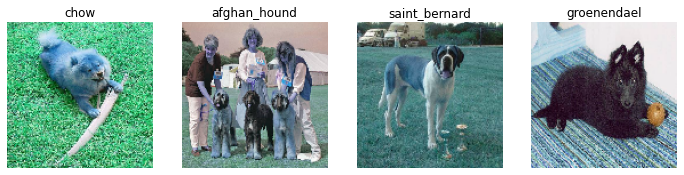

In [21]:
#Lets visualize and see what comes out
plt.figure(figsize=(12,8))
for p in range(1,5):
  ii = np.random.randint(0,1000)
  plt.subplot(1,4,p)
  plt.axis("off")
  plt.title(label_df.iloc[ii].breed)
  plt.imshow(x_train_data[ii])


#Very challenging image data set as can be seen from the sample

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
#Lets normalize the image by simply dividing by 255
x_train_data = x_train_data/255

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
#We will train_test_split from sklearn for splitting the data among train and validation
from sklearn.model_selection import train_test_split

In [0]:
#Use test split of 20% data

x_train, x_val, y_train, y_val = train_test_split(x_train_data,y_train_data,test_size=0.2,random_state=5)

In [25]:
#Check the shape of the training and validation sets
print("Shape of the x train",x_train.shape)
print("Shape of y train",y_train.shape)
print("Shape of the x val",x_val.shape)
print("Shape of y val",y_val.shape)

Shape of the x train (8177, 128, 128, 3)
Shape of y train (8177, 120)
Shape of the x val (2045, 128, 128, 3)
Shape of y val (2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
#Read the samples id values
test_img = pd.read_csv("sample_submission.csv",usecols=["id"])

In [27]:
#Sanity
test_img.sample(5)

,id
5600,88c64508d071c4f25dec348e55e79eb7
10058,f8c2b412dd7b37e28234314f6396aaed
309,071524aa73c1fa1fdd60aa54ebfd5719
2815,452557ff51d105fa6c4afbe5f41e1bcb
6393,9d024559062d855289c59de3071025c1


Run the below code to load the test image files in x_test_feature

In [28]:
#Lets only read 5 samples due to resource limitations (notebook crashed with all the images)
#For future - we can read directly from directory using imagedatagenerator flow from directory for prediction
#For our purposes we will only predict few samples.

x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img[0:5].id): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 5/5 [00:00<00:00, 320.74it/s]


In [0]:
#Convert to array for ease of manipulation later
x_test_feature = np.array(x_test_feature)

In [30]:
#Check the shape of the test image data ..only sample of 5 images
print("Shape of the test dataset",x_test_feature.shape)

Shape of the test dataset (5, 128, 128, 3)


Normalize the test data and convert it into 4 dimensions

In [0]:
#We will divide by 255 to normalize. Same as training
x_test_feature = x_test_feature/255

In [32]:
#Sanity
x_test_feature[0,0,0]

array([0.2627451 , 0.43529412, 0.40784314])

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
###Lets load required tensorflow and keras modules 
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Activation,Dropout,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import categorical_crossentropy

In [0]:
#Simple first model

model = Sequential()

#First Conv layer with 32 5x5 filters, relu activation
model.add(Conv2D(32,(5,5),activation="relu",input_shape=(128,128,3),name="conv_1"))

#Second Conv layer with 32 3x3 filters, relu activation
model.add(Conv2D(32,(3,3),activation="relu",name="conv_2"))

#Flatten
model.add(Flatten(name="flat_1"))

#Dense layer with 256 neurons
model.add(Dense(256,activation="relu",name="dense_1"))

#Dense output layer with 120 neurons
model.add(Dense(120,activation="softmax",name="dense_2"))


In [0]:
#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv_2 (Conv2D)              (None, 122, 122, 32)      9248      
_________________________________________________________________
flat_1 (Flatten)             (None, 476288)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               121929984 
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
Total params: 121,972,504
Trainable params: 121,972,504
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Compile the model
#Using Adam optimizer
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
#Train the model with epochs as 10
BATCH_SIZE = 128
EPOCHS = 10

In [0]:
#Lets define the early stopping with patience as 10
early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1,restore_best_weights=True)
callback_list = [early_stopping]

In [0]:
#Lets train the model
history = model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_data=(x_val,y_val))

Epoch 1/10
64/64 [==============================] - 7s 103ms/step - loss: 5.8735 - accuracy: 0.0109 - val_loss: 4.7865 - val_accuracy: 0.0093
Epoch 2/10
64/64 [==============================] - 6s 96ms/step - loss: 4.7726 - accuracy: 0.0176 - val_loss: 4.7579 - val_accuracy: 0.0117
Epoch 3/10
64/64 [==============================] - 6s 92ms/step - loss: 4.2597 - accuracy: 0.1123 - val_loss: 4.9108 - val_accuracy: 0.0254
Epoch 4/10
64/64 [==============================] - 6s 91ms/step - loss: 1.9974 - accuracy: 0.5579 - val_loss: 6.7120 - val_accuracy: 0.0274
Epoch 5/10
64/64 [==============================] - 6s 87ms/step - loss: 0.3801 - accuracy: 0.9266 - val_loss: 10.2324 - val_accuracy: 0.0244
Epoch 6/10
64/64 [==============================] - 6s 87ms/step - loss: 0.1175 - accuracy: 0.9858 - val_loss: 11.0725 - val_accuracy: 0.0264
Epoch 7/10
64/64 [==============================] - 6s 88ms/step - loss: 0.0462 - accuracy: 0.9930 - val_loss: 10.7891 - val_accuracy: 0.0249
Epoch 8/1

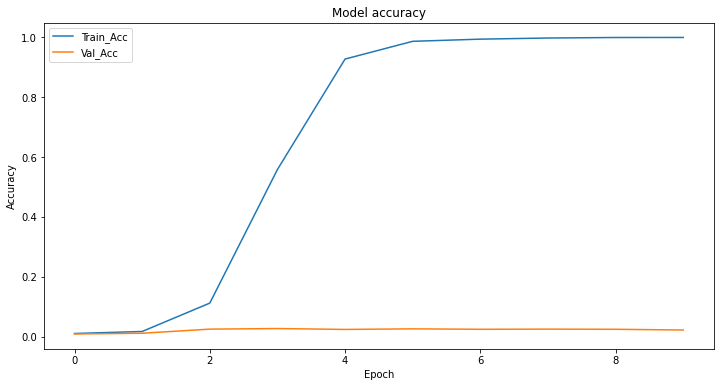

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

## The model accuracy is very poor !!!!

We can see from the training and validation loss and accuracy that the model is overfitting on the training data set and not learning the features which will be useful in identifying new images. The images themselves as seen in the sample visualization earlier are challenging. We will need to try out various pre-trained models and data augmentation techniques to see if we can get the model to learn better.

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
#Lets import image generator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
#Keep the img size as 128 for now as earlier
img_size=128

In [0]:
#Define a Imagegenerator

train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.5,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

val_datagen = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.5,
    width_shift_range=0.2,
    height_shift_range=0.2,
)



In [0]:
#Fit the data generator on the training images for trying out zca_whitening
#train_datagen.fit(x_train[0:1000])
#val_datagen.fit(x_val)

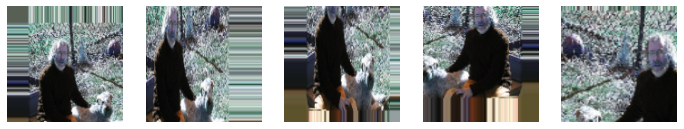

In [0]:
#Sample visualization of possible outputs from the generator

sample_gen = train_datagen.flow(x_train[4:5],batch_size=1)
plt.figure(figsize=(12,12))
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(sample_gen.next().squeeze())
    plt.plot()

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
#Initialize the train and validation generators

train_generator = train_datagen.flow(x_train,y_train,batch_size=32)
val_generator = val_datagen.flow(x_val,y_val,batch_size=32)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
#Same architecture as the first model

model1 = Sequential()

#First Conv layer with 32 5x5 filters, relu activation
model1.add(Conv2D(32,(5,5),activation="relu",input_shape=(128,128,3),name="conv_1"))

#Second Conv layer with 32 3x3 filters, relu activation
model1.add(Conv2D(32,(3,3),activation="relu",name="conv_2"))

#Flatten
model1.add(Flatten(name="flat_1"))

#Dense layer with 256 neurons
model1.add(Dense(256,activation="relu",name="dense_1"))

#Dense output layer with 120 neurons
model1.add(Dense(120,activation="softmax",name="dense_2"))

In [0]:
#Summary of the model
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv_2 (Conv2D)              (None, 122, 122, 32)      9248      
_________________________________________________________________
flat_1 (Flatten)             (None, 476288)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               121929984 
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
Total params: 121,972,504
Trainable params: 121,972,504
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Compile the model
#Will go with standard adam after few trails 

#opt = Adam(learning_rate=0.0001)
opt = SGD()
model1.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Train the model with epochs as 10
BATCH_SIZE = 128
EPOCHS = 10

In [0]:
#No of steps for each epoch...we will for this model go with the total records/batch size as standard

training_steps=train_generator.n//BATCH_SIZE
val_steps=val_generator.n//BATCH_SIZE
(training_steps,val_steps)

(63, 15)

In [0]:
#Lets train the model
#TF2 keras fit method now accepts generators as well

history1 = model1.fit(x=train_generator,epochs=EPOCHS,steps_per_epoch=training_steps,callbacks=callback_list,validation_data=val_generator,validation_steps=val_steps)

Epoch 1/10
63/63 [==============================] - 10s 161ms/step - loss: 4.7934 - accuracy: 0.0084 - val_loss: 4.7812 - val_accuracy: 0.0063
Epoch 2/10
63/63 [==============================] - 10s 158ms/step - loss: 4.7834 - accuracy: 0.0114 - val_loss: 4.7836 - val_accuracy: 0.0104
Epoch 3/10
63/63 [==============================] - 10s 155ms/step - loss: 4.7765 - accuracy: 0.0185 - val_loss: 4.7727 - val_accuracy: 0.0083
Epoch 4/10
63/63 [==============================] - 10s 156ms/step - loss: 4.7827 - accuracy: 0.0089 - val_loss: 4.7746 - val_accuracy: 0.0083
Epoch 5/10
63/63 [==============================] - 10s 158ms/step - loss: 4.7788 - accuracy: 0.0149 - val_loss: 4.7826 - val_accuracy: 0.0125
Epoch 6/10
63/63 [==============================] - 10s 158ms/step - loss: 4.7737 - accuracy: 0.0193 - val_loss: 4.7777 - val_accuracy: 0.0167
Epoch 7/10
63/63 [==============================] - 10s 155ms/step - loss: 4.7659 - accuracy: 0.0110 - val_loss: 4.7690 - val_accuracy: 0.0208

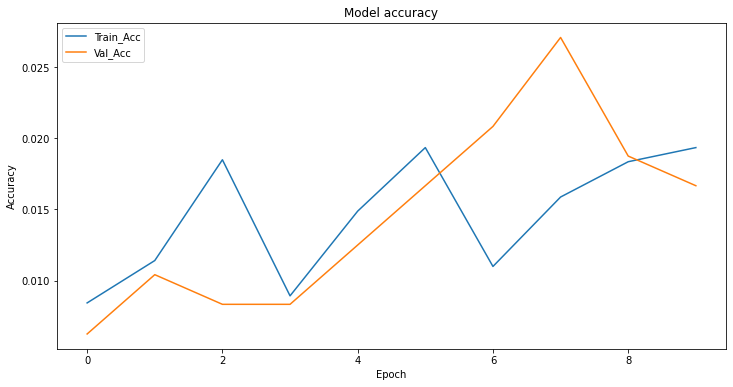

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

# Model accuracy is still poor!!!

We can see that even with image augmentation, the accuracy did not improve. The overfitting tendency is still seen even though it reduced from the original baseline model. 
The image augmentation has made the model jump around as well with Adam optimizer. Used of SGD slightly reduced the wavering of loss but it still exists. We will need to tune the learning rate and batch size to at least stabilize this model

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights='/content/drive/My Drive/dogbreed/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [0]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
#Add Custom Layers on top of the VGG16 convolution layers

#Flatten
flat = Flatten(name="custom_flat")(base_model.output)

#Dense with 1024
dense1 = Dense(1024,activation="relu",name="custom_dense1")(flat)

#Dense with 256
dense2 = Dense(256,activation="relu",name="custom_dense2")(dense1)

#Final Dense with 120
predictions = Dense(120,activation="softmax",name="custom_pred")(dense2)

final_model = Model(inputs=base_model.input,outputs=predictions)



### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
#Lets make all the base model layers as non trainable
for layer in base_model.layers:
  layer.trainable = False

In [0]:
#Check the final model summary now
final_model.summary()

#We can see that the base model parameters are frozen and will not be updated during training

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
#Lets compile the model..using Adam

opt = Adam(learning_rate=0.001)
#opt= SGD(learning_rate=0.001,momentum=0.0)
final_model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Train the model with epochs as 10
BATCH_SIZE = 128
EPOCHS = 10

In [0]:
#Lets train the model
final_history = final_model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_data=(x_val,y_val))

Epoch 1/10
64/64 [==============================] - 10s 157ms/step - loss: 4.7478 - accuracy: 0.0199 - val_loss: 4.6425 - val_accuracy: 0.0279
Epoch 2/10
64/64 [==============================] - 8s 126ms/step - loss: 4.3757 - accuracy: 0.0636 - val_loss: 4.1712 - val_accuracy: 0.0787
Epoch 3/10
64/64 [==============================] - 8s 126ms/step - loss: 3.8507 - accuracy: 0.1186 - val_loss: 3.8431 - val_accuracy: 0.1203
Epoch 4/10
64/64 [==============================] - 8s 126ms/step - loss: 3.4870 - accuracy: 0.1746 - val_loss: 3.6302 - val_accuracy: 0.1457
Epoch 5/10
64/64 [==============================] - 8s 126ms/step - loss: 3.2631 - accuracy: 0.2136 - val_loss: 3.5847 - val_accuracy: 0.1526
Epoch 6/10
64/64 [==============================] - 8s 126ms/step - loss: 3.1141 - accuracy: 0.2399 - val_loss: 3.4059 - val_accuracy: 0.1760
Epoch 7/10
64/64 [==============================] - 8s 125ms/step - loss: 2.9862 - accuracy: 0.2588 - val_loss: 3.3641 - val_accuracy: 0.1804
Epoch

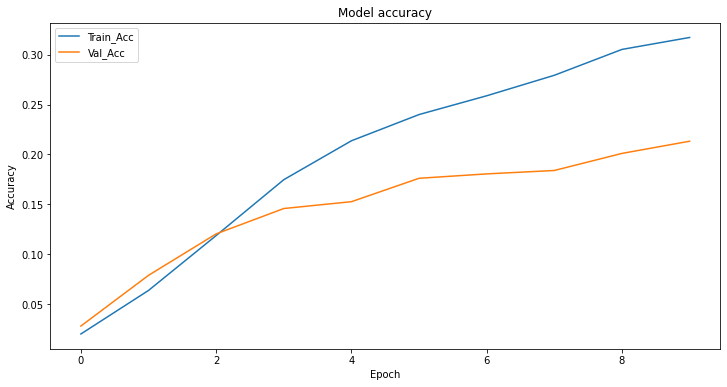

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

The accuracy has improved significantly. However, there is very clear overfitting happening as seen from the decreasing training loss but plateauing validation loss.
We will need to try out other hyperparameter tuning activities including use of image data augmentation to see if the overfitting can be reduced and overall accuracy improved

Lets play around with changes to see if the model accuracy increases and overfitting also reduces

In [0]:
#Add Custom Layers on top of the VGG16 convolution layers

#################################################################
#Adding this piece to help since this piece is being used for multiple trials of the model hyper parameters
tf.keras.backend.clear_session()

#Lets make all the base model layers as non trainable
for layer in base_model.layers:
  layer.trainable = False

##################################################################

#Flatten
#lr = Flatten(name="custom_flat")(base_model.output)

#Dense with 1024
#lr = Dense(1024,activation="relu",name="custom_dense1")(lr)
#lr = Dense(1024,activation="relu",name="custom_dense1")(base_model.output)
#lr = Dense(1024,name="custom_dense1")(lr)

lr = Dense(512,activation="relu",name="custom_dense1")(base_model.output) #Add dense layer qith 512 neurons

#Add a BN layer
lr = BatchNormalization()(lr)

#lr = Activation("relu")(lr)

#Add a dropout layer
lr = Dropout(0.5)(lr)
#drp1 = BatchNormalization()(dense1)

#Dense with 256
lr = Dense(256,activation="relu",name="custom_dense2")(lr)
#lr = Dense(256,name="custom_dense2")(lr)

lr = BatchNormalization()(lr)

#lr = Activation("relu")(lr)

lr = Dropout(0.5)(lr)

#Final Dense with 120
predictions = Dense(120,activation="softmax",name="custom_pred")(lr)
#predictions = Dense(120,activation="softmax",name="custom_pred")(lr)

new_model = Model(inputs=base_model.input,outputs=predictions)



In [0]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
#Lets compile the model
#Compile the model
opt = Adam(learning_rate=0.001)
#opt= SGD(learning_rate=0.001,momentum=0.9)
new_model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Train the model with epochs as 10
BATCH_SIZE = 32
EPOCHS = 20

In [0]:
#Lets train the model
new_history = new_model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_data=(x_val,y_val))

Epoch 1/20
256/256 [==============================] - 11s 42ms/step - loss: 5.1463 - accuracy: 0.0333 - val_loss: 4.2438 - val_accuracy: 0.0763
Epoch 2/20
256/256 [==============================] - 10s 38ms/step - loss: 4.1597 - accuracy: 0.0931 - val_loss: 3.7106 - val_accuracy: 0.1428
Epoch 3/20
256/256 [==============================] - 10s 38ms/step - loss: 3.7480 - accuracy: 0.1393 - val_loss: 3.5563 - val_accuracy: 0.1570
Epoch 4/20
256/256 [==============================] - 10s 38ms/step - loss: 3.5059 - accuracy: 0.1711 - val_loss: 3.3833 - val_accuracy: 0.2015
Epoch 5/20
256/256 [==============================] - 10s 38ms/step - loss: 3.3349 - accuracy: 0.2000 - val_loss: 3.3348 - val_accuracy: 0.2010
Epoch 6/20
256/256 [==============================] - 10s 38ms/step - loss: 3.2365 - accuracy: 0.2165 - val_loss: 3.2867 - val_accuracy: 0.2122
Epoch 7/20
256/256 [==============================] - 10s 38ms/step - loss: 3.1321 - accuracy: 0.2324 - val_loss: 3.2590 - val_accuracy:

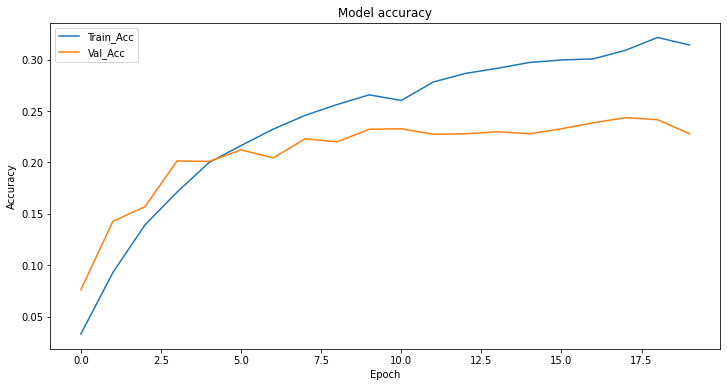

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(new_history.history['accuracy'])
plt.plot(new_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

Trial 1: The overfitting reduced slightly with the addition of dropout layers, but the accuracy is still low and validation loss again plateaued.

Trial 2: Adding BN improved the training accuracy significantly, but the overfitting increased as well.

Trial 3: Adding BN before activation function also did not improve much the validation accuracy or reduce overfitting.

Trial 4: Only have a flatten layer and then the final SoftMax prediction layer. Seeing the same behavior still with overfitting and validation accuracy less

Trial 5: Adding BN and dropout with 0.5 resulted in overfitting even though it reduced a bit from the previous attempts

Trial 6: Adding BN and dropout with 0.8 resulted in underfitting!!

Trial 7: Remove Flatten and add a dense of 512 and then 256 followed by output with BN and dropout layers - accuracy improved but then overfitting was also seen for 20 epochs.

We need to add data augmentation to see if it will help better generalization


In [0]:
#Define a Imagegenerator
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=.2,
    height_shift_range=.2,
    validation_split=0.2
)

In [0]:
#The flow_from_dataframe function was not detecting the images. Work around to add the extension
new_label = label_df.copy()

In [0]:
def append_ext(fn):
    return fn+".jpg"

new_label.id = new_label.id.apply(append_ext)

In [41]:
#Sanity check
new_label.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


In [0]:
#Increasing the image size to see if there is any difference
img_size=224

In [0]:
#Considering the number of images and their size the notebook crashed while trying out various transformations. 
#We will therfore use the flow_from_dataframe method to try to read the data in batches from the directory


train_generator = datagen.flow_from_dataframe(dataframe=new_label,directory="./train/",
                                              x_col="id",y_col="breed",
                                              target_size=(img_size,img_size),
                                              subset="training",
                                              has_ext=False,
                                              batch_size=32,
                                              shuffle=True,
                                              seed=42,
                                              class_mode="categorical") 




val_generator = datagen.flow_from_dataframe(dataframe=new_label,directory="./train/",
                                            x_col="id",y_col="breed",
                                            target_size=(img_size,img_size),
                                            subset="validation",
                                            has_ext=False,
                                            batch_size=1,
                                            shuffle=True,
                                            seed=42,
                                            class_mode="categorical")

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


Finetuning the model to reduce overfitting and improve accuracy

In [0]:
#Add Custom Layers on top of the VGG16 convolution layers

#Flatten
x = Flatten(name="custom_flat")(base_model.output)

#Dense with 1024
x = Dense(1024,activation="relu",name="custom_dense1")(x)

#Add a dropout
x = Dropout(0.5,name="custom_drop1")(x)

#x = BatchNormalization()(x)

#Dense with 256
x = Dense(256,activation="relu",name="custom_dense2")(x)

#Add a dropout
x = Dropout(0.5,name="custom_drop2")(x)

#x = BatchNormalization()(x)

#Final Dense with 120
predictions = Dense(120,activation="softmax",name="custom_pred")(x)

final_model1 = Model(inputs=base_model.input,outputs=predictions)


In [0]:
#Summary of the model
final_model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
#Train the model with epochs as 5, batch size is set to default 32
BATCH_SIZE = 32
EPOCHS = 5

In [0]:
#We will go over all the images before calling it a epoch

training_steps=train_generator.n
val_steps=val_generator.n
(training_steps,val_steps)

(8178, 2044)

In [0]:
#Lets define the early stopping with patience as 10
early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1,restore_best_weights=True)

#save model after every epoch since the training takes lot of time and to restart training after any issues

savepath = "/content/drive/My Drive/dogbreed/final_model1.h5"

save_model = ModelCheckpoint(filepath=savepath,save_best_only=True,save_freq="epoch",verbose=1)

callback_list = [early_stopping,save_model]

In [0]:
#Compile the model
opt=SGD()
#opt = SGD(learning_rate=0.001,momentum=0.9)
#opt = SGD(lr=0.001, decay=1e-6, momentum=0.6)
#opt = Adam(learning_rate=0.001)
final_model1.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
final_model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [0]:
#Lets train the model
final_history1 = final_model1.fit(x=train_generator,epochs=EPOCHS,steps_per_epoch=training_steps,callbacks=callback_list,validation_data=val_generator,validation_steps=val_steps)

Epoch 1/5
8178/8178 [==============================] - ETA: 0s - loss: 4.0330 - accuracy: 0.0841
Epoch 00001: saving model to /content/drive/My Drive/GL_Colab/Projects/CV/final_model1.h5
8178/8178 [==============================] - 3698s 452ms/step - loss: 4.0330 - accuracy: 0.0841 - val_loss: 3.5516 - val_accuracy: 0.1610
Epoch 2/5
8178/8178 [==============================] - ETA: 0s - loss: 3.4692 - accuracy: 0.1561
Epoch 00002: saving model to /content/drive/My Drive/GL_Colab/Projects/CV/final_model1.h5
8178/8178 [==============================] - 3690s 451ms/step - loss: 3.4692 - accuracy: 0.1561 - val_loss: 3.1435 - val_accuracy: 0.2172
Epoch 3/5
8178/8178 [==============================] - ETA: 0s - loss: 3.1622 - accuracy: 0.2086
Epoch 00003: saving model to /content/drive/My Drive/GL_Colab/Projects/CV/final_model1.h5
8178/8178 [==============================] - 3668s 449ms/step - loss: 3.1622 - accuracy: 0.2086 - val_loss: 2.9565 - val_accuracy: 0.2441
Epoch 4/5
8178/8178 [====

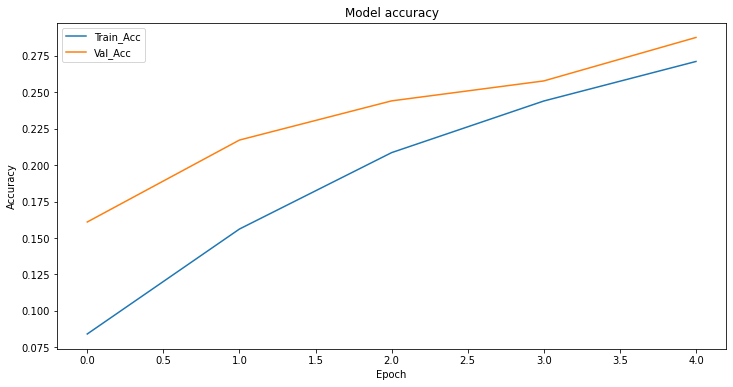

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(final_history1.history['accuracy'])
plt.plot(final_history1.history['val_accuracy'])
#plt.plot(final_history1.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

We can for sure see a better performance in terms of increasing training and validation accuracy. The loss is also decreasing. 
More epochs with slightly less learning rate could improve this further.

Training time with available resources is going to be a challenge

In [0]:
#Lets save this trained model for future use
#final_model1.save("/content/drive/My Drive/dogbreed/trained_final_model1.h5")
#final_model1.save("/content/drive/My Drive/dogbreed/final_model1.h5")

In [0]:
##Additional training by one epoch at a time due to the training time and resource limitations

In [0]:
#####LOAD the model from saved checkpoint#########
###Used because this trial took many hours and notebook kept crashing
#Toggle b.w which one to use

#final_model1 = tf.keras.models.load_model("/content/drive/My Drive/dogbreed/final_model1.h5")
final_model1 = tf.keras.models.load_model("/content/drive/My Drive/dogbreed/trained_final_model1.h5")

In [ ]:
#Warning due to the issue in handling submodels with layers with training set to False. 
#The model does seem to learn from where it left off

In [0]:
#Train the model with epochs as 1, batch size is set to default 32
BATCH_SIZE = 32
EPOCHS = 1

In [0]:
#We will go over all the images before calling it a epoch

training_steps=train_generator.n
val_steps=val_generator.n
(training_steps,val_steps)

(8178, 2044)

In [0]:
#Additional training..one epoch at a time
final_history1 = final_model1.fit(x=train_generator,epochs=EPOCHS,steps_per_epoch=training_steps,callbacks=callback_list,validation_data=val_generator,validation_steps=val_steps)

8178/8178 [==============================] - ETA: 0s - loss: 1.9242 - accuracy: 0.4673
Epoch 00001: val_loss improved from 2.38485 to 2.36430, saving model to /content/drive/My Drive/dogbreed/final_model1.h5
8178/8178 [==============================] - 3151s 385ms/step - loss: 1.9242 - accuracy: 0.4673 - val_loss: 2.3643 - val_accuracy: 0.3757


In [0]:
#Documenting the various attempts 
#Epoch #12 - loss: 2.3497 - accuracy: 0.3722 - val_loss: 2.5117 - val_accuracy: 0.3302
#Epoch #13 - loss: 2.3081 - accuracy: 0.3797 - val_loss: 2.5396 - val_accuracy: 0.3493
#Epoch #14 - loss: 2.2659 - accuracy: 0.3901 - val_loss: 2.4511 - val_accuracy: 0.3576
#Epoch #15 - loss: 2.2289 - accuracy: 0.3978 - val_loss: 2.4662 - val_accuracy: 0.3557
#Epoch #16 - loss: 2.1917 - accuracy: 0.4071 - val_loss: 2.4722 - val_accuracy: 0.3420
#Epoch # 17 = lr to 0.001 = loss: 2.0157 - accuracy: 0.4471 - val_loss: 2.4259 - val_accuracy: 0.3620
#Epoch # 18 = loss: 2.0037 - accuracy: 0.4499 - val_loss: 2.3792 - val_accuracy: 0.3655

##Changes # of steps
#Epoch # 19 255 steps - loss: 1.9977 - accuracy: 0.4494 - val_loss: 2.6455 - val_accuracy: 0.3810
#Epoch #20 - loss: 2.0086 - accuracy: 0.4378 - val_loss: 2.4370 - val_accuracy: 0.3651
#Epoch #21-25 - loss: 1.9840 - accuracy: 0.4588 - val_loss: 2.5243 - val_accuracy: 0.3492
#Epoch #26 -loss: 1.9956 - accuracy: 0.4513 - val_loss: 2.3978 - val_accuracy: 0.3738
#Epoch 27 -completed..model in final
#Epoch 28 -loss: 1.9828 - accuracy: 0.4537 - val_loss: 2.3942 - val_accuracy: 0.3708
#Epoch 29 - loss: 1.9773 - accuracy: 0.4555 - val_loss: 2.3905 - val_accuracy: 0.3777
#Epoch 30 - loss: 1.9708 - accuracy: 0.4563 - val_loss: 2.3726 - val_accuracy: 0.3743
#Epoch 31 - loss: 1.9645 - accuracy: 0.4591 - val_loss: 2.3873 - val_accuracy: 0.3718
#Epoch 32 - lr 0.01
#Epoch 33 - loss: 1.9581 - accuracy: 0.4603 - val_loss: 2.3903 - val_accuracy: 0.3831
#Epoch 34 -loss: 1.9523 - accuracy: 0.4601 - val_loss: 2.3839 - val_accuracy: 0.3792
#Epoch 35 - loss: 1.9505 - accuracy: 0.4607 - val_loss: 2.3652 - val_accuracy: 0.3792
#Epoch 36 - loss: 1.9418 - accuracy: 0.4630 - val_loss: 2.3814 - val_accuracy: 0.3679
#Epoch 37 - loss: 1.9402 - accuracy: 0.4629 - val_loss: 2.3920 - val_accuracy: 0.3674
#Epoch 38 - loss: 1.9336 - accuracy: 0.4654 - val_loss: 2.3848 - val_accuracy: 0.3841
#Epoch 39 - loss: 1.9271 - accuracy: 0.4666 - val_loss: 2.3848 - val_accuracy: 0.3855
#Epoch 40 - loss: 1.9242 - accuracy: 0.4673 - val_loss: 2.3643 - val_accuracy: 0.3757

In [0]:
#Lets save this trained model for future use

final_model1.save("/content/drive/My Drive/dogbreed/trained_final_model1.h5")

In [1]:
#Use below for changing learning rate of a loaded model

In [0]:
from tensorflow.keras import backend as K

In [0]:
K.get_value(final_model1.optimizer.lr)

0.001

In [0]:
K.set_value(final_model1.optimizer.lr, 0.001)

In [0]:
##Lets load the best trained model from above and try to predict the breed of test images

In [0]:
#Load the trained model
best_model = tf.keras.models.load_model("/content/drive/My Drive/dogbreed/trained_final_model1.h5")

In [0]:
#Do an evaluation on validation set to get the final score

In [0]:
#Get the model predictions in terms of probabilities
y_pred = best_model.predict(x_test_feature,verbose=1)

1/1 [==============================] - 0s 1ms/step


In [0]:
#Sanity check
y_pred.shape

(5, 120)

In [0]:
#Get the class names from the train generator
class_labels = list(train_generator.class_indices.keys())

In [0]:
#Check the label values
class_labels

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [0]:
#Load all the predictions into a DF for ease of use
test_image_pred = pd.DataFrame(data=y_pred,columns=class_labels)

In [0]:
#Check sample
test_image_pred.sample()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
3,0.000044,0.108247,0.000068,0.000376,0.000214,0.000287,9.582290e-07,0.000343,0.000043,0.000357,0.005016,0.000196,0.023971,0.000057,0.006663,0.004648,0.000043,0.00003,0.031945,0.000306,0.001135,0.000142,0.000118,0.001157,0.000055,0.006091,0.000028,0.000006,0.001201,0.000209,0.000001,0.000352,0.000001,0.000054,0.003427,0.000432,0.000021,0.00001,0.002298,0.000236,...,0.004766,0.000095,0.000097,0.000408,0.000048,0.000142,6.284614e-07,0.000139,0.016627,0.000922,0.014905,0.000268,0.000012,0.1913,0.000075,0.000056,0.000003,0.098889,0.001479,0.000109,0.000036,0.000207,0.000004,0.001502,0.000398,0.003162,0.004235,0.000021,0.000023,0.000055,0.000102,0.000066,0.000685,0.000289,0.0072,0.000051,0.000019,0.091665,0.000387,0.000012


In [0]:
#Add the corresponding id also to the predictions dataframe
#We can potentially modify this in future to predict the rows for all the test images and store here.
test_image_pred["id"] = test_img[0:5].id

In [0]:
#Sample check
test_image_pred.sample().T

,2
affenpinscher,2.59266e-07
afghan_hound,0.00574558
african_hunting_dog,6.82932e-05
airedale,2.57747e-05
american_staffordshire_terrier,0.00234063
...,...
west_highland_white_terrier,0.000525172
whippet,0.0846054
wire-haired_fox_terrier,0.00582024
yorkshire_terrier,4.83426e-08


#### Considering the computational time and (lack of resources) lets pick a smaller sample and see if we can try different 'top' layer architecture to check performance

In [0]:
##Lets see if we can take a smaller sample and run more epochs to see if accuracy levels will improve

In [0]:
#Get a sample of 1000 rows and add file extensions like earlier to read from directory directly
sample_label = label_df.sample(n=1000,random_state=5)

In [0]:
sample_label.id = sample_label.id.apply(append_ext)

In [44]:
#sanity
sample_label.head()

,id,breed
5086,80c9bfd32bdc32998a926edc1b186d9d.jpg,schipperke
5635,8e17a8cac3752b5341c951fcba07ece9.jpg,japanese_spaniel
42,011e06760794850c40f23d6426c40774.jpg,dhole
1644,28b0c66727c333afe43cb7c6006cd3a0.jpg,newfoundland
313,079e17a742380d333950962f2c83ffd2.jpg,dingo


In [0]:
#Define a Imagegenerator
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=.2,
    height_shift_range=.2,
    validation_split=0.2
)

In [0]:
img_size = 224

#Considering the number of images and their size the notebook crashed while trying out various transformations. 
#We will therfore use the flow_from_dataframe method to try to read the data in batches from the directory


train_generator = datagen.flow_from_dataframe(dataframe=sample_label,directory="./train/",
                                              x_col="id",y_col="breed",
                                              target_size=(img_size,img_size),
                                              subset="training",
                                              has_ext=False,
                                              batch_size=32,
                                              shuffle=True,
                                              seed=42,
                                              class_mode="categorical") 




val_generator = datagen.flow_from_dataframe(dataframe=sample_label,directory="./train/",
                                            x_col="id",y_col="breed",
                                            target_size=(img_size,img_size),
                                            subset="validation",
                                            has_ext=False,
                                            batch_size=1,
                                            shuffle=True,
                                            seed=42,
                                            class_mode="categorical")

Found 800 validated image filenames belonging to 120 classes.
Found 200 validated image filenames belonging to 120 classes.


In [0]:
#Add Custom Layers on top of the VGG16 convolution layers

#Flatten
x = Flatten(name="custom_flat")(base_model.output)

#Dense with 512
x = Dense(512,activation="relu",name="custom_dense1")(x)

#Add a dropout
x = Dropout(0.6,name="custom_drop1")(x)

#Dense with 512
x = Dense(512,activation="relu",name="custom_dense2")(x)

#Add a dropout
x = Dropout(0.6,name="custom_drop2")(x)

#Final Dense with 120
predictions = Dense(120,activation="softmax",name="custom_pred")(x)

model_sample = Model(inputs=base_model.input,outputs=predictions)

In [0]:
model_sample.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [0]:
#Lets define the early stopping with patience as 10
early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1,restore_best_weights=True)

#save model after every epoch since the training takes lot of time

savepath = "/content/drive/My Drive/dogbreed/fc_model_sample_best.h5"

save_model = ModelCheckpoint(filepath=savepath,save_best_only=True,save_freq="epoch",verbose=1)

callback_list = [early_stopping,save_model]

In [0]:
#Compile the model
#opt=SGD()
#opt = SGD(learning_rate=0.001,momentum=0.9)
#opt = SGD(lr=0.001, decay=1e-6, momentum=0.6)
opt = Adam(learning_rate=0.001)
model_sample.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
BATCH_SIZE = 32
EPOCHS = 6

In [0]:
#Run thru all the samples before considering the batch as complete
training_steps=train_generator.n
val_steps=val_generator.n
(training_steps,val_steps)

(800, 200)

In [0]:
#Lets train the model
history_sample = model_sample.fit(x=train_generator,epochs=EPOCHS,steps_per_epoch=training_steps,callbacks=callback_list,validation_data=val_generator,validation_steps=val_steps)

Epoch 1/6
800/800 [==============================] - ETA: 0s - loss: 4.3560 - accuracy: 0.0600
Epoch 00001: val_loss improved from inf to 4.28642, saving model to /content/drive/My Drive/dogbreed/fc_model_sample_best.h5
800/800 [==============================] - 374s 467ms/step - loss: 4.3560 - accuracy: 0.0600 - val_loss: 4.2864 - val_accuracy: 0.0850
Epoch 2/6
800/800 [==============================] - ETA: 0s - loss: 3.2236 - accuracy: 0.1921
Epoch 00002: val_loss improved from 4.28642 to 3.86919, saving model to /content/drive/My Drive/dogbreed/fc_model_sample_best.h5
800/800 [==============================] - 375s 469ms/step - loss: 3.2236 - accuracy: 0.1921 - val_loss: 3.8692 - val_accuracy: 0.1450
Epoch 3/6
800/800 [==============================] - ETA: 0s - loss: 2.5694 - accuracy: 0.3073
Epoch 00003: val_loss improved from 3.86919 to 3.80012, saving model to /content/drive/My Drive/dogbreed/fc_model_sample_best.h5
800/800 [==============================] - 373s 467ms/step - l

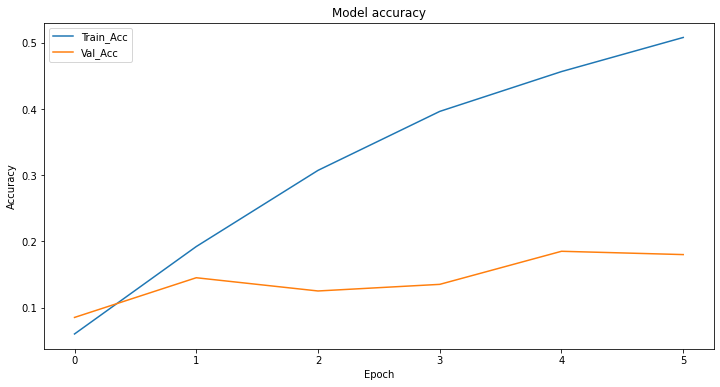

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history_sample.history['accuracy'])
plt.plot(history_sample.history['val_accuracy'])
#plt.plot(final_history1.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

This model also is clearly overfitting and accuracy does not seem to improve a lot. We clearly need to go back to the previous architecture and use more samples in order to improve the accuracy as well as reduce overfitting.
(Multiple hyperparameters were tried out like no of layers, no of neurons, dropout rates and adding batch normalization layers but continue to have the same behaviour.)

In [0]:
#Define a Imagegenerator
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=.2,
    height_shift_range=.2,
    validation_split=0.2
)

In [0]:
#Increase the image size further to see it makes a difference
img_size = 400

#Considering the number of images and their size the notebook crashed while trying out various transformations. 
#We will therfore use the flow_from_dataframe method to try to read the data in batches from the directory


train_generator = datagen.flow_from_dataframe(dataframe=sample_label,directory="./train/",
                                              x_col="id",y_col="breed",
                                              target_size=(img_size,img_size),
                                              subset="training",
                                              has_ext=False,
                                              batch_size=32,
                                              shuffle=True,
                                              seed=42,
                                              class_mode="categorical") 




val_generator = datagen.flow_from_dataframe(dataframe=sample_label,directory="./train/",
                                            x_col="id",y_col="breed",
                                            target_size=(img_size,img_size),
                                            subset="validation",
                                            has_ext=False,
                                            batch_size=1,
                                            shuffle=True,
                                            seed=42,
                                            class_mode="categorical")

Found 800 validated image filenames belonging to 120 classes.
Found 200 validated image filenames belonging to 120 classes.


In [0]:
#Add Custom Layers on top of the VGG16 convolution layers

#################################################################
tf.keras.backend.clear_session()

#Lets make all the base model layers as non trainable
for layer in base_model.layers:
  layer.trainable = False

##################################################################

lr = Dense(1024,activation="relu",name="custom_dense1")(base_model.output)

lr = Dropout(0.6)(lr)

#Final Dense with 120
predictions = Dense(120,activation="softmax",name="custom_pred")(lr)

model_sample1 = Model(inputs=base_model.input,outputs=predictions)

In [0]:
model_sample1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
#Lets define the early stopping with patience as 10
early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1,restore_best_weights=True)

#save model after every epoch since the training takes lot of time

savepath = "/content/drive/My Drive/dogbreed/model_sample_onlypred.h5"

save_model = ModelCheckpoint(filepath=savepath,save_best_only=True,save_freq="epoch",verbose=1)

callback_list = [early_stopping,save_model]

In [0]:
#Compile the model
#opt=SGD()
opt = SGD(learning_rate=0.001,momentum=0.9)
#opt = SGD(lr=0.001, decay=1e-6, momentum=0.6)
#opt = Adam(learning_rate=0.001)
model_sample1.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
BATCH_SIZE = 32
EPOCHS = 6

In [0]:
STEP_SIZE_TRAIN=train_generator.n
STEP_SIZE_VALID=val_generator.n
(STEP_SIZE_TRAIN,STEP_SIZE_VALID)

(800, 200)

In [0]:
#Lets train the model
history_sample1 = model_sample1.fit(x=train_generator,epochs=EPOCHS,steps_per_epoch=STEP_SIZE_TRAIN,callbacks=callback_list,validation_data=val_generator,validation_steps=STEP_SIZE_VALID)


Epoch 1/6
800/800 [==============================] - ETA: 0s - loss: 4.7299 - accuracy: 0.0222
Epoch 00001: val_loss improved from inf to 4.85815, saving model to /content/drive/My Drive/dogbreed/model_sample_onlypred.h5
800/800 [==============================] - 938s 1s/step - loss: 4.7299 - accuracy: 0.0222 - val_loss: 4.8581 - val_accuracy: 0.0100
Epoch 2/6
800/800 [==============================] - ETA: 0s - loss: 4.6485 - accuracy: 0.0321
Epoch 00002: val_loss did not improve from 4.85815
800/800 [==============================] - 934s 1s/step - loss: 4.6485 - accuracy: 0.0321 - val_loss: 4.8661 - val_accuracy: 0.0100
Epoch 3/6
800/800 [==============================] - ETA: 0s - loss: 4.5919 - accuracy: 0.0391
Epoch 00003: val_loss improved from 4.85815 to 4.83429, saving model to /content/drive/My Drive/dogbreed/model_sample_onlypred.h5
800/800 [==============================] - 933s 1s/step - loss: 4.5919 - accuracy: 0.0391 - val_loss: 4.8343 - val_accuracy: 0.0150
Epoch 4/6
80

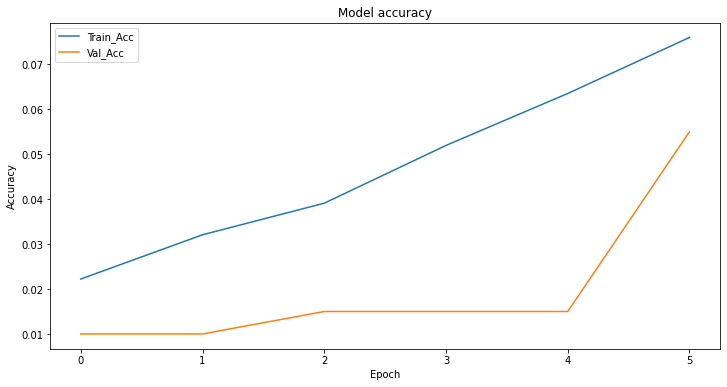

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history_sample1.history['accuracy'])
plt.plot(history_sample1.history['val_accuracy'])
#plt.plot(final_history1.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

Again see the same issue with low accuracy and overfitting tendency

In [0]:
##Using Adam optimizer to see if it speeds up convergence for the same model
#Reset the model and compiled again

opt = Adam(learning_rate=0.001)
model_sample1.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Lets train the model
history_sample1 = model_sample1.fit(x=train_generator,epochs=EPOCHS,steps_per_epoch=STEP_SIZE_TRAIN,callbacks=callback_list,validation_data=val_generator,validation_steps=STEP_SIZE_VALID)


Epoch 1/6
800/800 [==============================] - ETA: 0s - loss: 4.0476 - accuracy: 0.1112
Epoch 00001: val_loss improved from 4.72667 to 4.29186, saving model to /content/drive/My Drive/dogbreed/model_sample_onlypred.h5
800/800 [==============================] - 934s 1s/step - loss: 4.0476 - accuracy: 0.1112 - val_loss: 4.2919 - val_accuracy: 0.0800
Epoch 2/6
800/800 [==============================] - ETA: 0s - loss: 2.6869 - accuracy: 0.3346
Epoch 00002: val_loss improved from 4.29186 to 3.92169, saving model to /content/drive/My Drive/dogbreed/model_sample_onlypred.h5
800/800 [==============================] - 939s 1s/step - loss: 2.6869 - accuracy: 0.3346 - val_loss: 3.9217 - val_accuracy: 0.1400
Epoch 3/6
800/800 [==============================] - ETA: 0s - loss: 1.8411 - accuracy: 0.5229
Epoch 00003: val_loss did not improve from 3.92169
800/800 [==============================] - 935s 1s/step - loss: 1.8411 - accuracy: 0.5229 - val_loss: 3.9456 - val_accuracy: 0.1750
Epoch 4/

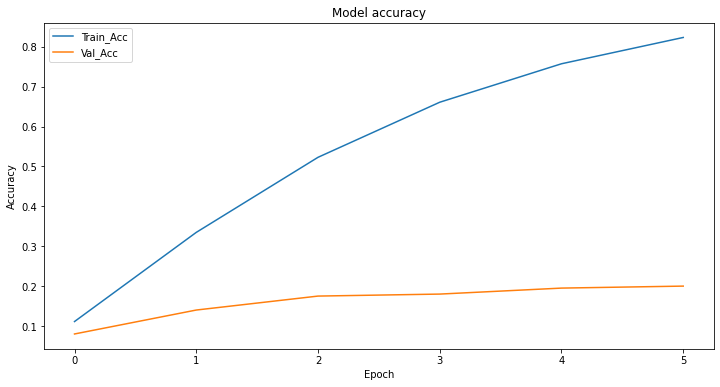

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history_sample1.history['accuracy'])
plt.plot(history_sample1.history['val_accuracy'])
#plt.plot(final_history1.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

Going to Adam increased the convergence but the model is definitely overfitting...we have to use more data and finetune the hyperparameters to increase the validation accuracy and reduce overfitting

Lets try one more attempt using the smaller data set

In [0]:
#Define a Imagegenerator
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=.2,
    height_shift_range=.2,
    validation_split=0.2
)

In [47]:
#Increase the image size further to see it makes a difference
img_size = 400

#Considering the number of images and their size the notebook crashed while trying out various transformations. 
#We will therfore use the flow_from_dataframe method to try to read the data in batches from the directory


train_generator = datagen.flow_from_dataframe(dataframe=sample_label,directory="./train/",
                                              x_col="id",y_col="breed",
                                              target_size=(img_size,img_size),
                                              subset="training",
                                              has_ext=False,
                                              batch_size=32,
                                              shuffle=True,
                                              seed=42,
                                              class_mode="categorical") 




val_generator = datagen.flow_from_dataframe(dataframe=sample_label,directory="./train/",
                                            x_col="id",y_col="breed",
                                            target_size=(img_size,img_size),
                                            subset="validation",
                                            has_ext=False,
                                            batch_size=1,
                                            shuffle=True,
                                            seed=42,
                                            class_mode="categorical")

Found 800 validated image filenames belonging to 120 classes.
Found 200 validated image filenames belonging to 120 classes.


In [0]:
#Add Custom Layers on top of the VGG16 convolution layers

#################################################################
tf.keras.backend.clear_session()

#Lets make all the base model layers as non trainable
for layer in base_model.layers:
  layer.trainable = False

##################################################################

lr = Flatten()(base_model.output)
lr = Dense(512,activation="relu",name="custom_dense1")(lr)

lr = BatchNormalization()(lr)
lr = Dropout(0.5)(lr)

lr = Dense(512,activation="relu",name="custom_dense2")(lr)

lr = BatchNormalization()(lr)
lr = Dropout(0.5)(lr)

#Final Dense with 120
predictions = Dense(120,activation="softmax",name="custom_pred")(lr)

new_model = Model(inputs=base_model.input,outputs=predictions)

In [49]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
#Lets unfreeze the last block of the VGG and train all together
for layer in base_model.layers:
  if "block5" in layer.name:
    layer.trainable = True
  elif "global_average_pooling2d" in layer.name:
    layer.trainable = True

In [53]:
#Check model summary again
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
#Lets define the early stopping with patience as 10
early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1,restore_best_weights=True)


savepath = "/content/drive/My Drive/dogbreed/new_model.h5"

save_model = ModelCheckpoint(filepath=savepath,save_best_only=True,save_freq="epoch",verbose=1)

callback_list = [early_stopping,save_model]

In [0]:
#Compile the model
opt=SGD()
#opt = SGD(learning_rate=0.001,momentum=0.9)
#opt = SGD(lr=0.001, decay=1e-6, momentum=0.6)
#opt = Adam(learning_rate=0.0001)
new_model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
BATCH_SIZE = 32
EPOCHS = 2

In [59]:
STEP_SIZE_TRAIN=train_generator.n
STEP_SIZE_VALID=val_generator.n
(STEP_SIZE_TRAIN,STEP_SIZE_VALID)

(800, 200)

In [61]:
#Lets train the model
new_history = new_model.fit(x=train_generator,epochs=EPOCHS,steps_per_epoch=STEP_SIZE_TRAIN,callbacks=callback_list,validation_data=val_generator,validation_steps=STEP_SIZE_VALID)


Epoch 1/2
800/800 [==============================] - ETA: 0s - loss: 0.2234 - accuracy: 0.9674
Epoch 00001: val_loss improved from 4.59001 to 3.79625, saving model to /content/drive/My Drive/dogbreed/new_model.h5
800/800 [==============================] - 836s 1s/step - loss: 0.2234 - accuracy: 0.9674 - val_loss: 3.7962 - val_accuracy: 0.2400
Epoch 2/2
800/800 [==============================] - ETA: 0s - loss: 0.0871 - accuracy: 0.9919
Epoch 00002: val_loss did not improve from 3.79625
800/800 [==============================] - 833s 1s/step - loss: 0.0871 - accuracy: 0.9919 - val_loss: 3.9841 - val_accuracy: 0.2050


Again no escape from overfitting and less validation accuracy

As an experiment lets try using another pretrained model using ResNet50V2

In [0]:
from tensorflow.keras.applications import ResNet50V2
# Instantiate the model with the pre-trained weights (no top)
x_model= ResNet50V2(weights='imagenet',
                 include_top=False, pooling='avg')

94674944/94668760 [==============================] - 3s 0us/step


In [0]:
#Add Custom Layers on top of the VGG16 convolution layers

#################################################################
tf.keras.backend.clear_session()

#Lets make all the base model layers as non trainable
for layer in x_model.layers:
  layer.trainable = False

##################################################################

lr = Dense(512,activation="relu",name="custom_dense_1")(x_model.output)

lr = Dropout(0.5)(lr)

#Add Global Pooling layer

#lr = GlobalAveragePooling2D()(x_model.output)
lr = Dense(512,activation="relu",name="custom_dense_2")(lr)

lr = Dropout(0.5)(lr)

#Final Dense with 120
predictions = Dense(120,activation="softmax",name="custom_pred")(lr)
#predictions = Dense(120,activation="softmax",name="custom_pred")(lr)

X_model = Model(inputs=x_model.input,outputs=predictions)



In [0]:
X_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, None, None, 6 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
#Lets define the early stopping with patience as 10
early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1,restore_best_weights=True)

#save model after every epoch since the training takes lot of time

savepath = "/content/drive/My Drive/dogbreed/resnet_sample_best_onlypred.h5"

save_model = ModelCheckpoint(filepath=savepath,save_best_only=True,save_freq="epoch",verbose=1)

callback_list = [early_stopping,save_model]

In [0]:
#Lets compile the model
#Compile the model
opt = Adam(learning_rate=0.001)
#opt= SGD(learning_rate=0.001,momentum=0.9)
X_model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Train the model with epochs as 10
BATCH_SIZE = 32
EPOCHS = 6

In [0]:
STEP_SIZE_TRAIN=train_generator.n
STEP_SIZE_VALID=val_generator.n
(STEP_SIZE_TRAIN,STEP_SIZE_VALID)

(800, 200)

In [0]:
#Lets train the model
X_history = X_model.fit(x=train_generator,epochs=EPOCHS,steps_per_epoch=STEP_SIZE_TRAIN,callbacks=callback_list,validation_data=val_generator,validation_steps=STEP_SIZE_VALID)

Epoch 1/6
800/800 [==============================] - ETA: 0s - loss: 1.2902 - accuracy: 0.6694
Epoch 00001: val_loss improved from inf to 1.80705, saving model to /content/drive/My Drive/dogbreed/resnet_sample_best_onlypred.h5
800/800 [==============================] - 806s 1s/step - loss: 1.2902 - accuracy: 0.6694 - val_loss: 1.8070 - val_accuracy: 0.5200
Epoch 2/6
800/800 [==============================] - ETA: 0s - loss: 0.2054 - accuracy: 0.9350
Epoch 00002: val_loss did not improve from 1.80705
800/800 [==============================] - 803s 1s/step - loss: 0.2054 - accuracy: 0.9350 - val_loss: 2.0972 - val_accuracy: 0.5400
Epoch 3/6
800/800 [==============================] - ETA: 0s - loss: 0.1454 - accuracy: 0.9544
Epoch 00003: val_loss did not improve from 1.80705
800/800 [==============================] - 801s 1s/step - loss: 0.1454 - accuracy: 0.9544 - val_loss: 2.3862 - val_accuracy: 0.5600
Epoch 4/6
800/800 [==============================] - ETA: 0s - loss: 0.1385 - accurac

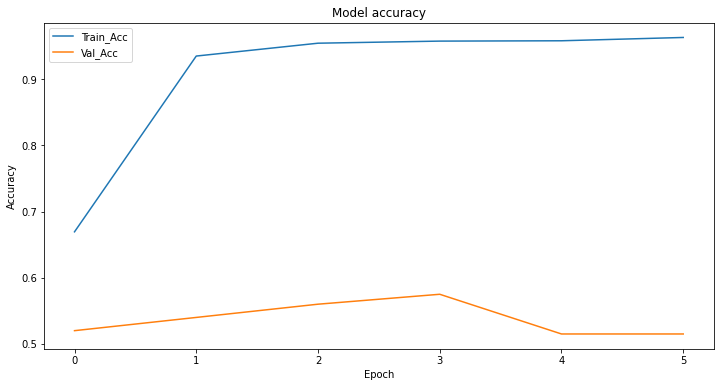

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(X_history.history['accuracy'])
plt.plot(X_history.history['val_accuracy'])
#plt.plot(final_history1.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

The model clearly is overfitting and validation accuracy could only reach about 51%. While overall accuracy is better than the previous models the overfitting aspect can probably only be fixed with additional data. Most likely using all the 10K samples and additional hyper parameter tuning will improve the overall performance and reduce the overfitting

## FINAL SUMMARY OF ALL ATTEMPTS AND INSIGHTS

Several model architectures and approaches were tried. The dataset was challenging as observed in the sample images. The images are of various qualities, with lot of other objects including people in the images and various orientation and zoom levels.

The first plain and simple CNN resulted in extremely poor accuracies. The second attempt by using data augmentation also did not result in much improvement. 

The use of pre-trained VGG16 model improved the accuracy but did have serious overfitting issues.

Use of data augmentation with various parameter changes and image sizes were tried out. The overfitting tendency was reduced in the model with dropouts and usage of all the training samples. However, the accuracy could not be improved beyond ~40%. 

Several challenges were observed with training such a data set with this large model. The training time and computational resources were significant even for these many number of images. (Model checkpoints and running small number of epochs at a time was tried out)

Several attempts were also done with a small sample of the data set. However, the accuracy could not be improved without serious overfitting. Multiple trials were performed with different optimizers and learning rates. 

As an experimental attempt, tried to use a pretrained ResNet model (trained on ImageNet). This improved the accuracy but still had overfitting tendency.

For future work, running the full training data samples with data augmentation and learning rate schedulers could help with improving the accuracy further with reduced overfitting.
